Training Data Shape: (353, 10)
Testing Data Shape: (89, 10)

Decision Tree Results
MSE: 4371.134143451884
R² Score: 0.17496999879708397

Linear Regression Results
MSE: 2900.173287883232
R² Score: 0.45260660216173787

Model Comparison
Decision Tree -> MSE: 4371.13, R²: 0.1750
Linear Regression -> MSE: 2900.17, R²: 0.4526


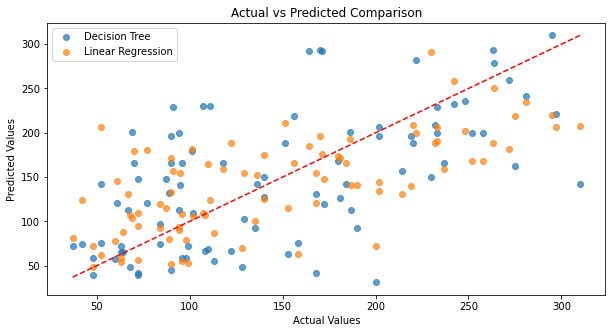

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# Decision Tree Regression
# -----------------------------
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Results")
print("MSE:", dt_mse)
print("R² Score:", dt_r2)

# -----------------------------
# Linear Regression
# -----------------------------
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg_model.predict(X_test_scaled)

lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)

print("\nLinear Regression Results")
print("MSE:", lin_mse)
print("R² Score:", lin_r2)

# -----------------------------
# Comparison
# -----------------------------
print("\nModel Comparison")
print(f"Decision Tree -> MSE: {dt_mse:.2f}, R²: {dt_r2:.4f}")
print(f"Linear Regression -> MSE: {lin_mse:.2f}, R²: {lin_r2:.4f}")

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(10,5))

plt.scatter(y_test, y_pred_dt, alpha=0.7, label="Decision Tree")
plt.scatter(y_test, y_pred_lin, alpha=0.7, label="Linear Regression")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Comparison")
plt.legend()
plt.show()
